# Case Study on Preprocessing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

**Loading the data with 'PassengerId' as index column**

In [2]:
data = pd.read_csv(r'D:\ICT DSA\Datasets-20211106\titanic_dataset.csv', index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Summary Analysis of dataset**

In [3]:
data.shape

(891, 11)

The dataset has 891 rows and 11 columns.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


We have 11 columns, with three columns 'Age', 'Cabin' and 'Embarked' containing missing values. 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked' are categorical data values.

In [5]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


'Survived' is a binary data value. 'Pclass', 'SibSp', 'Parch' are ordinal values.

In [6]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

'Age' has 177 missing values. 'Cabin' has 687 missing values.

<AxesSubplot:>

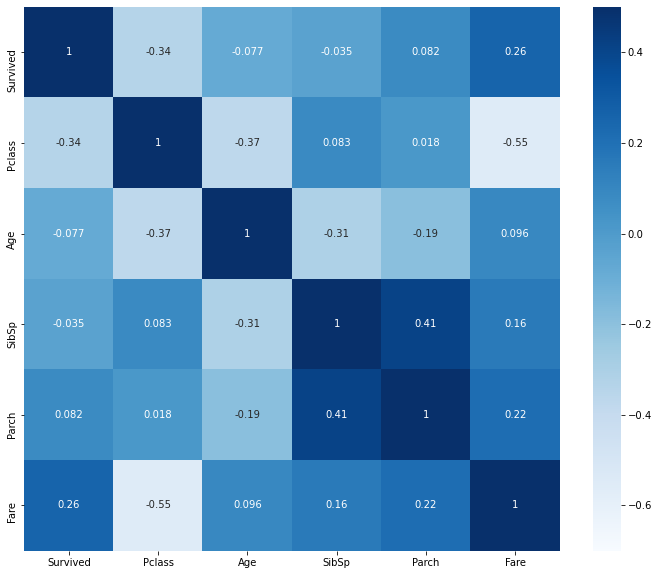

In [7]:
corr = data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, vmin = -0.7, vmax = 0.5, annot=True, cmap='Blues')

**Missing values**

We can replace missing values in 'Age' with its mean. Mean does not bias the model towards one outcome.

In [8]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

We have to check whether Cabin values are missing at random.

In [9]:
data.groupby(data['Cabin'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Cabin,,,,,,
False,0.666667,1.196078,35.258349,0.441176,0.436275,76.141504
True,0.299854,2.639010,28.048341,0.547307,0.365357,19.157325


We can see that the probability of survival is influenced by 'Cabin' values. Hence, we can set a binary indicator for 'Cabin' values.

In [10]:
data['cabin_ind'] = np.where(data['Cabin'].isnull(), 0, 1)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_ind
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


**One hot encoding**

'Sex' can be converted to numerical data through encoding.

In [11]:
data['Sex'] = pd.get_dummies(data['Sex'])

In [12]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_ind
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0


Categorical variables 'Name', 'Ticket', 'Cabin', 'Embarked' do not contribute to calculating survival of passengers. Hence, they can be dropped from the dataset.

In [13]:
data.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1,inplace=True)
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,cabin_ind
PassengerId,,,,,,,,
1,0,3,0,22.000000,1,0,7.2500,0
2,1,1,1,38.000000,1,0,71.2833,1
3,1,3,1,26.000000,0,0,7.9250,0
4,1,1,1,35.000000,1,0,53.1000,1
5,0,3,0,35.000000,0,0,8.0500,0
6,0,3,0,29.699118,0,0,8.4583,0
7,0,1,0,54.000000,0,0,51.8625,1
8,0,3,0,2.000000,3,1,21.0750,0
9,1,3,1,27.000000,0,2,11.1333,0


In [14]:
data.shape

(891, 8)

In [15]:
data.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
cabin_ind    0
dtype: int64

Since there are no more missing values in the dataset, we can next check for outliers.

**Outliers:** Age

Text(0.5, 1.0, 'Boxplot of Age')

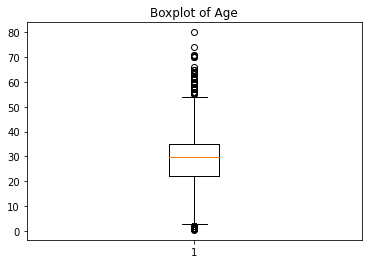

In [16]:
plt.boxplot(data['Age'])
plt.title('Boxplot of Age')

We detect outliers using the Inter-quratile range method.

In [17]:
Q1 = np.percentile(data['Age'], 25, interpolation='midpoint')
Q3 = np.percentile(data['Age'], 75, interpolation='midpoint')
IQR = Q3 - Q1
IQR

13.0

In [18]:
low = Q1 - 1.5*IQR
high = Q3 + 1.5*IQR
print(low)
print(high)

2.5
54.5


Datapoints below 'low' and above 'high' are the outliers.

In [19]:
outlier_1 = data['Age'] < low
outlier_2 = data['Age'] > high

In [20]:
#indices of outlier_1
data.loc[outlier_1].index

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

In [21]:
#indices of outlier_2
data.loc[outlier_2].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

We now drop the outliers by dropping the data at their respective indices.

In [22]:
data.drop([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387, 470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832,
           12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253, 269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493,
           494, 546, 556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773, 830, 852, 880], inplace=True)

In [23]:
data.shape

(825, 8)

The number of rows has dropped from 891 to 825.

**Outliers:** Fare

Text(0.5, 1.0, 'Boxplot of Fare')

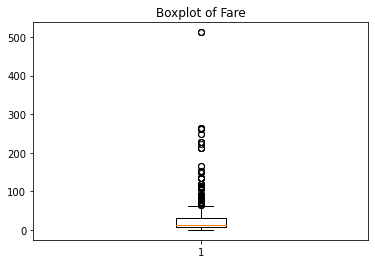

In [24]:
plt.boxplot(data['Fare'])
plt.title('Boxplot of Fare')

In [25]:
Q1 = np.percentile(data['Fare'], 25, interpolation = 'midpoint')
Q3 = np.percentile(data['Fare'], 75, interpolation='midpoint')
IQR = Q3 - Q1
print(IQR)

22.174999999999997


In [26]:
low = Q1 - 1.5*IQR
high = Q3 + 1.5*IQR
print(low)
print(high)

-25.366699999999994
63.333299999999994


Since, lower limit is negative, we can ignore the outliers less than the lower limit (Fare cannot be negative).

In [27]:
outlier_2 = data['Fare'] > high

In [28]:
#indices of outlier_2
ind_2 = data.loc[outlier_2].index
print(ind_2)

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89,  98,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
           dtype='int64', name='PassengerId', length=107)


In [29]:
len(ind_2)

107

In [30]:
data.drop(ind_2, inplace=True)

In [31]:
data.shape

(718, 8)

**Outliers:** SibSp

{'whiskers': [<matplotlib.lines.Line2D at 0x1a361611760>,
 'caps': [<matplotlib.lines.Line2D at 0x1a361611e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a3616113d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a36161e520>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a36161e880>],
 'means': []}

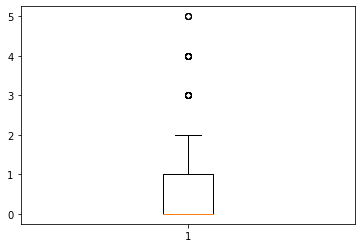

In [32]:
plt.boxplot(data['SibSp'])

In [33]:
Q1 = np.percentile(data['SibSp'], 25, interpolation = 'midpoint')
Q3 = np.percentile(data['SibSp'], 75, interpolation='midpoint')
IQR = Q3 - Q1
print(IQR)

1.0


In [34]:
low = Q1 - 1.5*IQR
high = Q3 + 1.5*IQR
print(low)
print(high)

-1.5
2.5


In [35]:
outlier_2 = data['SibSp'] > high

In [36]:
#indices of outlier_2
ind_2 = data.loc[outlier_2].index
print(ind_2)

Int64Index([ 25,  51,  60,  64,  69,  72,  86, 172, 177, 183, 230, 234, 262,
            267, 279, 375, 410, 481, 486, 542, 543, 635, 684, 687, 727, 788,
            814, 820, 851],
           dtype='int64', name='PassengerId')


In [37]:
data.drop(ind_2, inplace=True)

In [38]:
data.shape

(689, 8)

The dataset has now 689 rows and 8 columns.

**Linear Regression Model**

In [39]:
x = data.drop('Survived', axis=1)
y = data['Survived']

In [40]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,random_state=42, test_size=0.2)
print('xtrain shape: ', xtrain.shape)
print('xtest shape: ', xtest.shape)
print('ytrain shape: ', ytrain.shape)
print('ytest shape: ', ytest.shape)

xtrain shape:  (551, 7)
xtest shape:  (138, 7)
ytrain shape:  (551,)
ytest shape:  (138,)


In [41]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(xtrain, ytrain)
pred = model.predict(xtest)

In [42]:
from sklearn.metrics import mean_squared_error
print('MSE is:', mean_squared_error(ytest, pred))

MSE is: 0.1404930255177418


In [43]:
from sklearn.metrics import r2_score
print('R-squared:', r2_score(ytest, pred))

R-squared: 0.3969913955465687


The model has R-square value of 0.397 and MSE 0.14. We can try to improve the model by feature scaling.

**Min Max Scaling**

In [44]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))

In [45]:
from pandas import DataFrame
sc_data = min_max.fit_transform(data)
x = pd.DataFrame(sc_data)
x.describe()

,0,1,2,3,4,5,6,7
count,689.000000,689.000000,689.000000,689.000000,689.00000,689.000000,689.000000,689.000000
mean,0.341074,0.746734,0.312046,0.511781,0.13643,0.044993,0.270959,0.140784
std,0.474415,0.361793,0.463665,0.187116,0.25051,0.125771,0.213306,0.348051
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.392157,0.00000,0.000000,0.127962,0.000000
50%,0.000000,1.000000,0.000000,0.523512,0.00000,0.000000,0.171068,0.000000
75%,1.000000,1.000000,1.000000,0.588235,0.00000,0.000000,0.382051,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [46]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 42, test_size = 0.2)
model_mm = lm.fit(xtrain, ytrain)
pred = model_mm.predict(xtest)

In [47]:
print('MSE is:', mean_squared_error(ytest, pred))
print('R squared is:', r2_score(ytest, pred))

MSE is: 2.6526311780245254e-31
R squared is: 1.0


By appling Min Max scaling, the model has improved. 